In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Snowpark
from snowflake.snowpark.session import Session
from snowflake.snowpark import functions as F
from snowflake.snowpark.types import *
from snowflake.snowpark.version import VERSION
from snowflake.snowpark.functions import pandas_udf


In [3]:
# Read credentials
with open('creds.json') as f:
    connection_parameters = json.load(f)    
session = Session.builder.configs(connection_parameters).create()

In [4]:
session

In [5]:
snowpark_version = VERSION
print('Database                    : {}'.format(session.get_current_database()))
print('Schema                      : {}'.format(session.get_current_schema()))
print('Warehouse                   : {}'.format(session.get_current_warehouse()))
print('Role                        : {}'.format(session.get_current_role()))
print('Snowpark for Python version : {}.{}.{}'.format(snowpark_version[0],snowpark_version[1],snowpark_version[2]))

Database                    : "HOUSING"
Schema                      : "PUBLIC"
Warehouse                   : "XSMALL_WH"
Role                        : "ACCOUNTADMIN"
Snowpark for Python version : 1.0.0


In [6]:
session.sql("SELECT count(*) FROM HOUSING.PUBLIC.HOUSINGPRICE").collect()

[Row(COUNT(*)=30144)]

In [7]:
housepricingdf = session.table("HOUSING.PUBLIC.HOUSINGPRICE")

In [8]:
housepricingdf=housepricingdf.to_pandas()
type(housepricingdf)

pandas.core.frame.DataFrame

In [9]:
housepricingdf.columns = map(lambda x: str(x).upper(), housepricingdf.columns)

In [10]:
# data1.columns = map(lambda x: str(x).upper(), data1.columns)
# snowdf_details = session.createDataFrame(data1)
# snowdf_details.show()
# snowdf_details.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE") 

# session.table("HOUSING.PUBLIC.FULL_HOUSINGPRICE").show(5)


In [11]:
housepricingdf.head()

,DATE,SUBURB,ADDRESS,ROOMS,TYPE,PRICE,METHOD,SELLERG,DATE.1,DISTANCE,...,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,YEARBUILT,COUNCILAREA,LATTITUDE,LONGTITUDE,REGIONNAME,PROPERTYCOUNT
0,2016-01-28,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,S,Fletchers,2016-01-28,11.2,...,1.0,2.0,490.0,NaN,NaN,Boroondara City Council,-37.8361,145.1006,Southern Metropolitan,5457.0
1,2016-01-28,Surrey Hills,1/10 Florence Rd,2,u,813000.0,S,Fletchers,2016-01-28,11.2,...,1.0,2.0,108.0,NaN,NaN,Boroondara City Council,-37.8276,145.1023,Southern Metropolitan,5457.0
2,2016-01-28,Canterbury,140 Canterbury Rd,4,h,NaN,SP,Fletchers,2016-01-28,9.0,...,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0
3,2016-03-09,Williamstown,54 Twyford St,3,h,1535000.0,S,Greg,2016-03-09,8.0,...,1.0,1.0,507.0,186.0,1910.0,Hobsons Bay City Council,-37.8681,144.8994,Western Metropolitan,6380.0
4,2016-03-09,Newport,1/26 Thorpe St,3,h,826000.0,S,Village,2016-03-09,8.4,...,1.0,2.0,281.0,100.0,1957.0,Hobsons Bay City Council,-37.8457,144.8651,Western Metropolitan,5498.0


In [12]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144 entries, 0 to 30143
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           30144 non-null  object 
 1   SUBURB         30144 non-null  object 
 2   ADDRESS        30144 non-null  object 
 3   ROOMS          30144 non-null  int8   
 4   TYPE           30144 non-null  object 
 5   PRICE          23573 non-null  float64
 6   METHOD         30144 non-null  object 
 7   SELLERG        30144 non-null  object 
 8   DATE.1         30144 non-null  object 
 9   DISTANCE       30144 non-null  float64
 10  POSTCODE       30144 non-null  float64
 11  BEDROOM2       23327 non-null  float64
 12  BATHROOM       23321 non-null  float64
 13  CAR            22982 non-null  float64
 14  LANDSIZE       20078 non-null  float64
 15  BUILDINGAREA   12147 non-null  float64
 16  YEARBUILT      13827 non-null  float64
 17  COUNCILAREA    30142 non-null  object 
 18  LATTIT

In [13]:
# # data = pd.read_csv("./datasets/MELBOURNE_HOUSE_PRICES_LESS.csv")
# # data['Date'].head(100)
# data1.info()

In [14]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144 entries, 0 to 30143
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           30144 non-null  object 
 1   SUBURB         30144 non-null  object 
 2   ADDRESS        30144 non-null  object 
 3   ROOMS          30144 non-null  int8   
 4   TYPE           30144 non-null  object 
 5   PRICE          23573 non-null  float64
 6   METHOD         30144 non-null  object 
 7   SELLERG        30144 non-null  object 
 8   DATE.1         30144 non-null  object 
 9   DISTANCE       30144 non-null  float64
 10  POSTCODE       30144 non-null  float64
 11  BEDROOM2       23327 non-null  float64
 12  BATHROOM       23321 non-null  float64
 13  CAR            22982 non-null  float64
 14  LANDSIZE       20078 non-null  float64
 15  BUILDINGAREA   12147 non-null  float64
 16  YEARBUILT      13827 non-null  float64
 17  COUNCILAREA    30142 non-null  object 
 18  LATTIT

In [15]:
housepricingdf.isnull().sum()

DATE                 0
SUBURB               0
ADDRESS              0
ROOMS                0
TYPE                 0
PRICE             6571
METHOD               0
SELLERG              0
DATE.1               0
DISTANCE             0
POSTCODE             0
BEDROOM2          6817
BATHROOM          6823
CAR               7162
LANDSIZE         10066
BUILDINGAREA     17997
YEARBUILT        16317
COUNCILAREA          2
LATTITUDE         6600
LONGTITUDE        6600
REGIONNAME           2
PROPERTYCOUNT        2
dtype: int64

In [16]:
housepricingdf.describe()

,ROOMS,PRICE,DISTANCE,POSTCODE,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,YEARBUILT,LATTITUDE,LONGTITUDE,PROPERTYCOUNT
count,30144.000000,2.357300e+04,30144.000000,30144.000000,23327.000000,23321.000000,22982.000000,20078.000000,12147.000000,13827.000000,23544.000000,23544.000000,30142.000000
mean,3.015725,1.055272e+06,10.894533,3114.059216,3.039311,1.606063,1.693195,584.022263,158.001108,1964.950170,-37.812025,145.001666,7544.185754
std,0.974964,6.464492e+05,6.558900,104.132112,0.993397,0.723174,1.001103,3557.012648,422.167797,37.401358,0.086615,0.115427,4423.509742
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.360000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,203.000000,100.000000,1940.000000,-37.861803,144.936245,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,493.000000,133.000000,1970.000000,-37.808780,145.006800,6763.000000
75%,4.000000,1.300000e+06,13.800000,3153.000000,4.000000,2.000000,2.000000,666.750000,184.000000,2000.000000,-37.757000,145.069163,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [17]:
housepricingdf.nunique()

DATE                68
SUBURB             346
ADDRESS          29486
ROOMS               12
TYPE                 3
PRICE             2722
METHOD               9
SELLERG            363
DATE.1              68
DISTANCE           213
POSTCODE           208
BEDROOM2            15
BATHROOM            11
CAR                 14
LANDSIZE          1631
BUILDINGAREA       721
YEARBUILT          156
COUNCILAREA         33
LATTITUDE        11161
LONGTITUDE       12203
REGIONNAME           8
PROPERTYCOUNT      339
dtype: int64

In [18]:
cols=['SUBURB','ROOMS','TYPE','METHOD','SELLERG','REGIONNAME','PROPERTYCOUNT','DISTANCE','COUNCILAREA','BEDROOM2','BATHROOM'
           ,'CAR','LANDSIZE','BUILDINGAREA','PRICE']
housepricingdf=housepricingdf[cols]
housepricingdf

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,Surrey Hills,3,h,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,3.0,1.0,2.0,490.0,NaN,1205000.0
1,Surrey Hills,2,u,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,2.0,1.0,2.0,108.0,NaN,813000.0
2,Canterbury,4,h,SP,Fletchers,Southern Metropolitan,3265.0,9.0,Boroondara City Council,4.0,2.0,0.0,808.0,198.0,NaN
3,Williamstown,3,h,S,Greg,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,1.0,1.0,507.0,186.0,1535000.0
4,Newport,3,h,S,Village,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,2.0,1.0,2.0,281.0,100.0,826000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30139,Highett,3,h,S,Greg,Southern Metropolitan,4794.0,16.0,Bayside City Council,3.0,1.0,2.0,700.0,NaN,1242000.0
30140,Highett,3,t,PI,Purplebricks,Southern Metropolitan,4794.0,16.0,Bayside City Council,NaN,NaN,NaN,NaN,NaN,1395000.0
30141,Hoppers Crossing,4,h,S,Barry,Western Metropolitan,13830.0,18.4,Wyndham City Council,4.0,2.0,2.0,650.0,NaN,540000.0
30142,South Melbourne,4,h,PI,Marshall,Southern Metropolitan,5943.0,1.9,Port Phillip City Council,4.0,2.0,0.0,178.0,174.0,NaN


In [19]:
housepricingdf.isnull().sum()

SUBURB               0
ROOMS                0
TYPE                 0
METHOD               0
SELLERG              0
REGIONNAME           2
PROPERTYCOUNT        2
DISTANCE             0
COUNCILAREA          2
BEDROOM2          6817
BATHROOM          6823
CAR               7162
LANDSIZE         10066
BUILDINGAREA     17997
PRICE             6571
dtype: int64

In [20]:
cols_zero = ['PROPERTYCOUNT','DISTANCE','BEDROOM2','BATHROOM','CAR']
housepricingdf[cols_zero]=housepricingdf[cols_zero].fillna(0)


In [21]:
housepricingdf.LANDSIZE=housepricingdf.LANDSIZE.fillna(housepricingdf.LANDSIZE.mean())
housepricingdf.BUILDINGAREA=housepricingdf.BUILDINGAREA.fillna(housepricingdf.BUILDINGAREA.mean())


In [22]:
housepricingdf.dropna(inplace=True)
housepricingdf.isnull().sum()

SUBURB           0
ROOMS            0
TYPE             0
METHOD           0
SELLERG          0
REGIONNAME       0
PROPERTYCOUNT    0
DISTANCE         0
COUNCILAREA      0
BEDROOM2         0
BATHROOM         0
CAR              0
LANDSIZE         0
BUILDINGAREA     0
PRICE            0
dtype: int64

In [23]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23571 entries, 0 to 30141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBURB         23571 non-null  object 
 1   ROOMS          23571 non-null  int8   
 2   TYPE           23571 non-null  object 
 3   METHOD         23571 non-null  object 
 4   SELLERG        23571 non-null  object 
 5   REGIONNAME     23571 non-null  object 
 6   PROPERTYCOUNT  23571 non-null  float64
 7   DISTANCE       23571 non-null  float64
 8   COUNCILAREA    23571 non-null  object 
 9   BEDROOM2       23571 non-null  float64
 10  BATHROOM       23571 non-null  float64
 11  CAR            23571 non-null  float64
 12  LANDSIZE       23571 non-null  float64
 13  BUILDINGAREA   23571 non-null  float64
 14  PRICE          23571 non-null  float64
dtypes: float64(8), int8(1), object(6)
memory usage: 2.7+ MB


In [24]:
housepricingdf.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,Surrey Hills,3,h,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,3.0,1.0,2.0,490.0,158.001108,1205000.0
1,Surrey Hills,2,u,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,2.0,1.0,2.0,108.0,158.001108,813000.0
3,Williamstown,3,h,S,Greg,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,1.0,1.0,507.0,186.000000,1535000.0
4,Newport,3,h,S,Village,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,2.0,1.0,2.0,281.0,100.000000,826000.0
5,Newport,3,h,SP,Sweeney,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,3.0,2.0,2.0,301.0,195.000000,1025000.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# for column in housepricingdf.columns:
#     le.fit(housepricingdf[column]) 

In [26]:
# le.fit(housepricingdf) 
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
housepricingdf.SUBURB=le1.fit_transform(housepricingdf.SUBURB)
housepricingdf.TYPE = le2.fit_transform(housepricingdf.TYPE)
housepricingdf.METHOD = le3.fit_transform(housepricingdf.METHOD)
housepricingdf.SELLERG=le4.fit_transform(housepricingdf.SELLERG)
housepricingdf.REGIONNAME=le5.fit_transform(housepricingdf.REGIONNAME)
housepricingdf.COUNCILAREA = le6.fit_transform(housepricingdf.COUNCILAREA)
housepricingdf

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,292,3,0,1,95,5,5457.0,11.2,2,3.0,1.0,2.0,490.000000,158.001108,1205000.0
1,292,2,2,1,95,5,5457.0,11.2,2,2.0,1.0,2.0,108.000000,158.001108,813000.0
3,329,3,0,1,110,6,6380.0,8.0,10,3.0,1.0,1.0,507.000000,186.000000,1535000.0
4,228,3,0,1,296,6,5498.0,8.4,10,2.0,1.0,2.0,281.000000,100.000000,826000.0
5,228,3,0,3,275,6,5498.0,8.4,10,3.0,2.0,2.0,301.000000,195.000000,1025000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30137,166,4,0,3,314,6,5556.0,18.0,3,4.0,2.0,2.0,600.000000,174.000000,580000.0
30138,165,2,2,1,121,5,4794.0,16.0,1,2.0,1.0,1.0,130.000000,158.001108,677500.0
30139,165,3,0,1,110,5,4794.0,16.0,1,3.0,1.0,2.0,700.000000,158.001108,1242000.0
30140,165,3,1,0,235,5,4794.0,16.0,1,0.0,0.0,0.0,584.022263,158.001108,1395000.0


In [27]:
housepricingdf.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,292,3,0,1,95,5,5457.0,11.2,2,3.0,1.0,2.0,490.0,158.001108,1205000.0
1,292,2,2,1,95,5,5457.0,11.2,2,2.0,1.0,2.0,108.0,158.001108,813000.0
3,329,3,0,1,110,6,6380.0,8.0,10,3.0,1.0,1.0,507.0,186.000000,1535000.0
4,228,3,0,1,296,6,5498.0,8.4,10,2.0,1.0,2.0,281.0,100.000000,826000.0
5,228,3,0,3,275,6,5498.0,8.4,10,3.0,2.0,2.0,301.0,195.000000,1025000.0


In [28]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23571 entries, 0 to 30141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBURB         23571 non-null  int64  
 1   ROOMS          23571 non-null  int8   
 2   TYPE           23571 non-null  int64  
 3   METHOD         23571 non-null  int64  
 4   SELLERG        23571 non-null  int64  
 5   REGIONNAME     23571 non-null  int64  
 6   PROPERTYCOUNT  23571 non-null  float64
 7   DISTANCE       23571 non-null  float64
 8   COUNCILAREA    23571 non-null  int64  
 9   BEDROOM2       23571 non-null  float64
 10  BATHROOM       23571 non-null  float64
 11  CAR            23571 non-null  float64
 12  LANDSIZE       23571 non-null  float64
 13  BUILDINGAREA   23571 non-null  float64
 14  PRICE          23571 non-null  float64
dtypes: float64(8), int64(6), int8(1)
memory usage: 2.7 MB


In [29]:
X = housepricingdf.drop(['PRICE'],axis=1)
y=housepricingdf.PRICE

In [30]:
X.shape,y.shape

((23571, 14), (23571,))

In [31]:
housepricingdf.shape

(23571, 15)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((16499, 14), (7072, 14))

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
from sklearn import metrics
pred = lr.predict(X_test)
score = metrics.r2_score(pred,y_test)
score

-0.35594039989051396

In [36]:
df= pd.DataFrame({'Actual_Price': np.round(y_test), 
                   'Predicted_Price': np.round(pred),
                 })
df['difference']=df.apply(lambda x: x.Predicted_Price-x.Actual_Price,axis=1)
df.head(10)

,Actual_Price,Predicted_Price,difference
24685,860000.0,114674.0,-745326.0
1164,568500.0,1089824.0,521324.0
5481,1950000.0,1844661.0,-105339.0
2963,875000.0,900313.0,25313.0
27038,1094000.0,1095174.0,1174.0
645,1715000.0,1591761.0,-123239.0
3562,2040000.0,1271457.0,-768543.0
1058,1405000.0,1257373.0,-147627.0
2188,981000.0,1037770.0,56770.0
8327,570500.0,1375430.0,804930.0


In [37]:
# Creating a User Defined Function within Snowflake to do the scoring there
def predict_pandas_udf(df: pd.DataFrame) -> pd.Series:
    return pd.Series(lr.predict(df))  



In [38]:
housepricingdf.columns = map(lambda x: str(x).upper(), housepricingdf.columns)
snowdf_details = session.createDataFrame(housepricingdf)
snowdf_details.show()
snowdf_details.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded") 

session.table("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded").show(5)

create_temp_table is deprecated. We still respect this parameter when it is True but please consider using `table_type="temporary"` instead.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"  |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"  |"REGIONNAME"  |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"  |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"  |"BUILDINGAREA"      |"PRICE"    |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|292       |3        |0       |1         |95         |5             |5457.0           |11.2        |2              |3.0         |1.0         |2.0    |490.0       |158.00110757388654  |1205000.0  |
|292       |2        |2       |1         |95         |5             |5457.0           |11.2        |2              |2.0         |1.0         |2.0    |108.0       |158.00110757388654  |813000.0   |
|329       |3  

In [39]:
linear_model_vec = pandas_udf(func=predict_pandas_udf,
                                return_type=FloatType(),
                                input_types=[IntegerType(),IntegerType(),IntegerType(),IntegerType(),IntegerType(),IntegerType(),FloatType(),FloatType(),FloatType(),IntegerType(),FloatType(),FloatType(),FloatType(),FloatType()],
                                session=session,
                                packages = ("pandas","scikit-learn"), max_batch_size=200)

In [40]:

# Calling the UDF to do the scoring (pushing down to Snowflake)
output = session.table('HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded').select(*list(X.columns),
                    linear_model_vec(list(X.columns)).alias('PREDICTED_PRICE'),
                    (F.col('Price')).alias('ACTUAL_PRICE')                                              
                    )

output.show(5)


Passing arguments to a UDF with a list or tuple is deprecated. We still respect this invocation but please consider passing variable-length arguments without a list or tuple.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"  |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"  |"REGIONNAME"  |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"  |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"  |"BUILDINGAREA"      |"PREDICTED_PRICE"   |"ACTUAL_PRICE"  |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|292       |3        |0       |1         |95         |5             |5457.0           |11.2        |2              |3.0         |1.0         |2.0    |490.0       |158.00110757388654  |1049874.6853844114  |1205000.0       |
|292       |2        |2       |1         |95         |5             |5457.0           |11.2        |2       

In [41]:
output=output.to_pandas()

In [42]:
output.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,219,3,0,1,46,5,2555.0,14.6,12,3.0,1.0,3.0,771.000000,158.001108,9.401036e+05,1020000.0
1,11,2,2,1,136,5,4836.0,6.3,27,2.0,1.0,1.0,0.000000,76.000000,7.021112e+05,599000.0
2,329,4,0,1,317,6,6380.0,8.0,10,3.0,2.0,1.0,452.000000,158.001108,1.588412e+06,1325000.0
3,239,2,0,1,46,4,3692.0,14.7,12,0.0,0.0,0.0,584.022263,158.001108,6.863183e+05,1242000.0
4,233,3,0,2,197,2,11364.0,5.5,6,3.0,2.0,2.0,286.000000,188.000000,1.445616e+06,1382500.0


In [43]:
output.SUBURB=le1.inverse_transform(output.SUBURB)
output.TYPE = le2.inverse_transform(output.TYPE)
output.METHOD = le3.inverse_transform(output.METHOD)
output.SELLERG=le4.inverse_transform(output.SELLERG)
output.REGIONNAME=le5.inverse_transform(output.REGIONNAME)
output.COUNCILAREA = le6.inverse_transform(output.COUNCILAREA)


In [44]:
output.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,Moorabbin,3,h,S,Buxton,Southern Metropolitan,2555.0,14.6,Kingston City Council,3.0,1.0,3.0,771.000000,158.001108,9.401036e+05,1020000.0
1,Armadale,2,u,S,Jellis,Southern Metropolitan,4836.0,6.3,Stonnington City Council,2.0,1.0,1.0,0.000000,76.000000,7.021112e+05,599000.0
2,Williamstown,4,h,S,hockingstuart,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,2.0,1.0,452.000000,158.001108,1.588412e+06,1325000.0
3,Oakleigh South,2,h,S,Buxton,South-Eastern Metropolitan,3692.0,14.7,Kingston City Council,0.0,0.0,0.0,584.022263,158.001108,6.863183e+05,1242000.0
4,Northcote,3,h,SA,Nelson,Northern Metropolitan,11364.0,5.5,Darebin City Council,3.0,2.0,2.0,286.000000,188.000000,1.445616e+06,1382500.0


In [45]:
snowdf_details = session.createDataFrame(output)
snowdf_details.show()
snowdf_details.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE_PREDICTED") 




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"        |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"      |"REGIONNAME"                |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"               |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"         |"BUILDINGAREA"      |"PREDICTED_PRICE"   |"ACTUAL_PRICE"  |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Moorabbin       |3        |h       |S         |Buxton         |Southern Metropolitan       |2555.0           |14.6        |Kingston City Council       |3.0         |1.0         |3.0    |771.0       

In [46]:
# Also get a local dataframe to review the results
snowdf_details=snowdf_details.toPandas()

In [47]:
snowdf_details

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,Moorabbin,3,h,S,Buxton,Southern Metropolitan,2555.0,14.6,Kingston City Council,3.0,1.0,3.0,771.000000,158.001108,9.401036e+05,1020000.0
1,Armadale,2,u,S,Jellis,Southern Metropolitan,4836.0,6.3,Stonnington City Council,2.0,1.0,1.0,0.000000,76.000000,7.021112e+05,599000.0
2,Williamstown,4,h,S,hockingstuart,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,2.0,1.0,452.000000,158.001108,1.588412e+06,1325000.0
3,Oakleigh South,2,h,S,Buxton,South-Eastern Metropolitan,3692.0,14.7,Kingston City Council,0.0,0.0,0.0,584.022263,158.001108,6.863183e+05,1242000.0
4,Northcote,3,h,SA,Nelson,Northern Metropolitan,11364.0,5.5,Darebin City Council,3.0,2.0,2.0,286.000000,188.000000,1.445616e+06,1382500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,Lower Plenty,2,u,VB,Fletchers,Eastern Metropolitan,1624.0,14.6,Banyule City Council,2.0,1.0,1.0,119.000000,158.001108,3.113103e+05,420000.0
23567,Keilor,3,u,SP,Brad,Western Metropolitan,2339.0,14.5,Brimbank City Council,0.0,0.0,0.0,584.022263,158.001108,7.211543e+05,650000.0
23568,Heathmont,3,h,S,Ray,Eastern Metropolitan,3794.0,21.3,Maroondah City Council,3.0,2.0,2.0,471.000000,144.000000,7.910787e+05,912000.0
23569,Heidelberg Heights,3,h,S,Ray,Eastern Metropolitan,2947.0,8.8,Banyule City Council,3.0,1.0,3.0,619.000000,158.001108,1.150500e+06,810000.0


In [48]:
# Score It
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 332479.4735138926
MSE: 245028578812.31766
RMSE: 495003.6149487372


In [49]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,pred))

R^2 = 0.4213412340993177


In [51]:
lr.fit(X_train,y_train).score(X_test, y_test)

0.4213374327840367

In [81]:
errors = abs(pred - y_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

64.73


# Model 2 Random Forest

In [52]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23571 entries, 0 to 30141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBURB         23571 non-null  int64  
 1   ROOMS          23571 non-null  int8   
 2   TYPE           23571 non-null  int64  
 3   METHOD         23571 non-null  int64  
 4   SELLERG        23571 non-null  int64  
 5   REGIONNAME     23571 non-null  int64  
 6   PROPERTYCOUNT  23571 non-null  float64
 7   DISTANCE       23571 non-null  float64
 8   COUNCILAREA    23571 non-null  int64  
 9   BEDROOM2       23571 non-null  float64
 10  BATHROOM       23571 non-null  float64
 11  CAR            23571 non-null  float64
 12  LANDSIZE       23571 non-null  float64
 13  BUILDINGAREA   23571 non-null  float64
 14  PRICE          23571 non-null  float64
dtypes: float64(8), int64(6), int8(1)
memory usage: 2.7 MB


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2) 


In [61]:
X2 = housepricingdf.drop(['PRICE'],axis=1)
y2=housepricingdf.PRICE

In [62]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = .20, random_state= 0)

In [63]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

RandomForestRegressor(n_jobs=2, random_state=0)

<Figure size 2500x2000 with 0 Axes>

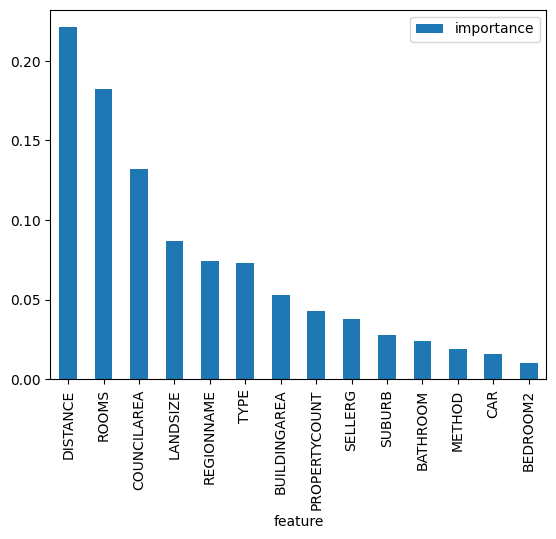

In [64]:
#feature importance
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':X2_train.columns, 'importance': np.round(rf_regressor.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rf_regressor, param_grid, cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error')

In [67]:
#Set the model paramters after tunning.
rf_regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False) 


In [68]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='mse', max_features='auto', n_jobs=2,
                      random_state=0)

In [69]:
y2_pred = rf_regressor.predict(X2_test)  # test the output by changing values 

In [70]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 176884.42440152582
Mean Squared Error: 85656902397.0197
Root Mean Squared Error: 292672.0048057547


In [71]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y2_test,y2_pred))

R^2 = 0.7846942951694195


In [79]:
rf_regressor.score(X2_test, y2_test)

0.7840667058494774

In [80]:
errors = abs(y2_pred - y2_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y2_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

83.3


In [105]:
df2= pd.DataFrame({'Actual_Price': np.round(y2_test), 
                   'Predicted_Price': np.round(y2_pred),
                 })
df2['difference']=df2.apply(lambda x: x.Predicted_Price-x.Actual_Price,axis=1)
df2.head(10)

,Actual_Price,Predicted_Price,difference
13805,1800000.0,1510434.0,-289566.0
6821,1335000.0,1273470.0,-61530.0
6590,662000.0,559987.0,-102013.0
24336,769000.0,704359.0,-64641.0
22019,720000.0,770161.0,50161.0
20671,2536000.0,2371678.0,-164322.0
14715,910000.0,813050.0,-96950.0
17980,945000.0,848077.0,-96923.0
10676,672000.0,692330.0,20330.0
9673,360000.0,437982.0,77982.0


In [103]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, roc_auc_score, r2_score, explained_variance_score
modelnames = [ 
 'KNeighborsRegressor()',
 'LinearRegression()', 
 'DecisionTreeRegressor()', 
 'GradientBoostingRegressor()',
]
metricnames = [
 'mean_absolute_error', 
 'median_absolute_error',
 'r2_score',
]
metrics = pd.DataFrame(index = modelnames, columns = metricnames)
for modelname in modelnames:
    model = eval(modelname)
    pred_test = model.fit(X_train, y_train).predict(X_test)
    for metricname in metricnames:
        metrics.loc[modelname, metricname] = print(eval(f'{metricname}(y_test, pred_test)'))
        metrics.loc[modelname, metricname] 

284953.23260746605
164000.0
0.45211628312124974
332479.4735138926
244402.73994906957
0.4213374327840367
243753.68535539214
135000.0
0.563092715710257
201361.20805303013
129721.05309200153
0.7273901958574609


In [ ]:
knn=KNeighborsRegressor()

knn.fit(X2_train, y2_train)

In [134]:
from sklearn.neighbors import KNeighborsRegressor

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=2, scoring = 'neg_mean_squared_error')

grid_knn.fit(X2_train, y2_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=4, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=

In [135]:
best_score = np.sqrt(-grid_knn.best_score_)
print(best_score)    
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

467768.71557013434
{'algorithm': 'kd_tree', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsRegressor(algorithm='kd_tree', n_neighbors=6, weights='distance')


In [132]:
pred_knn = grid_knn.predict(X2_test)


In [133]:
from sklearn import metrics
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y2_test,pred_knn))

R^2 = 0.5060860846423179


In [136]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, pred_knn)))

Mean Absolute Error: 265341.62506506103
Mean Squared Error: 195933975574.8889
Root Mean Squared Error: 442644.29915552837


In [137]:
errors = abs(pred_knn - y2_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y2_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

71.98


In [158]:
xgb = XGBRegressor()
xgb.fit(X2_train,y2_train)
pred_xgb=xgb.predict(X2_test)

/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [159]:
from sklearn import metrics
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y2_test,pred_xgb))

R^2 = 0.7997427606518817


In [160]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, pred_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, pred_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, pred_xgb)))

Mean Absolute Error: 175130.13917351537
Mean Squared Error: 79463067551.61269
Root Mean Squared Error: 281891.94304132333


In [161]:
errors = abs(pred_xgb - y2_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y2_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

83.33


In [167]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X2_train, y2_train)

/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [170]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[21:26:10] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:10] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:10] WARNING: ../src/objective/regression_

In [171]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[21:27:17] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

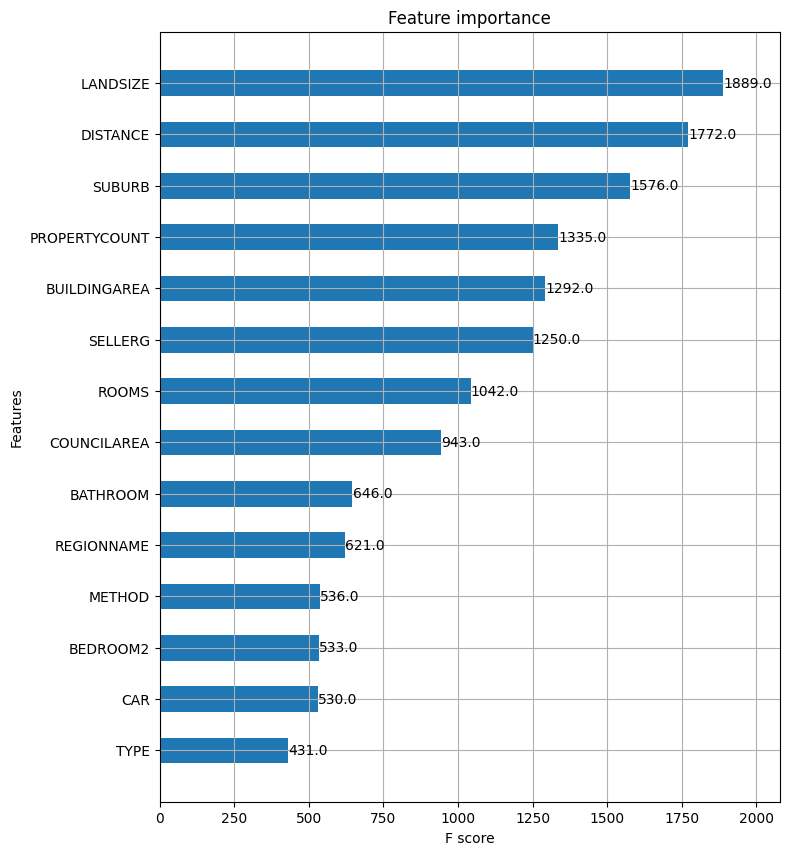

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [175]:
dtest=xgb.DMatrix(X2_test)

In [176]:
y_predict = np.exp2(model.predict(dtest))

/var/folders/t3/g34fqy5x7g93yy85dp44j8700000gn/T/ipykernel_46599/3384565814.py:1: RuntimeWarning: overflow encountered in exp2
  y_predict = np.exp2(model.predict(dtest))


In [181]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

In [185]:
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5,verbose=50).fit(X2_train, y2_train)
print("The best hyperparameters are ",search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START learning_rate=0.01, max_depth=4, n_estimators=500..........
[CV 1/5; 1/12] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.707 total time=   3.0s
[CV 2/5; 1/12] START learning_rate=0.01, max_depth=4, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 1/12] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.718 total time=   2.5s
[CV 3/5; 1/12] START learning_rate=0.01, max_depth=4, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 1/12] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.716 total time=   2.5s
[CV 4/5; 1/12] START learning_rate=0.01, max_depth=4, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 1/12] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.714 total time=   2.4s
[CV 5/5; 1/12] START learning_rate=0.01, max_depth=4, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 1/12] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.716 total time=   2.5s
[CV 1/5; 2/12] START learning_rate=0.01, max_depth=4, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 2/12] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.716 total time=   2.9s
[CV 2/5; 2/12] START learning_rate=0.01, max_depth=4, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 2/12] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.728 total time=   2.8s
[CV 3/5; 2/12] START learning_rate=0.01, max_depth=4, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 2/12] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.720 total time=   2.9s
[CV 4/5; 2/12] START learning_rate=0.01, max_depth=4, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 2/12] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.724 total time=   2.9s
[CV 5/5; 2/12] START learning_rate=0.01, max_depth=4, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 2/12] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.726 total time=   2.8s
[CV 1/5; 3/12] START learning_rate=0.01, max_depth=4, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 3/12] END learning_rate=0.01, max_depth=4, n_estimators=700;, score=0.723 total time=   3.5s
[CV 2/5; 3/12] START learning_rate=0.01, max_depth=4, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 3/12] END learning_rate=0.01, max_depth=4, n_estimators=700;, score=0.736 total time=   3.4s
[CV 3/5; 3/12] START learning_rate=0.01, max_depth=4, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 3/12] END learning_rate=0.01, max_depth=4, n_estimators=700;, score=0.725 total time=   3.6s
[CV 4/5; 3/12] START learning_rate=0.01, max_depth=4, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 3/12] END learning_rate=0.01, max_depth=4, n_estimators=700;, score=0.732 total time=   3.6s
[CV 5/5; 3/12] START learning_rate=0.01, max_depth=4, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 3/12] END learning_rate=0.01, max_depth=4, n_estimators=700;, score=0.732 total time=   3.8s
[CV 1/5; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.726 total time=   3.4s
[CV 2/5; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.747 total time=   4.7s
[CV 3/5; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.737 total time=   3.8s
[CV 4/5; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.738 total time=   3.7s
[CV 5/5; 4/12] START learning_rate=0.01, max_depth=5, n_estimators=500..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 4/12] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.736 total time=   3.4s
[CV 1/5; 5/12] START learning_rate=0.01, max_depth=5, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 5/12] END learning_rate=0.01, max_depth=5, n_estimators=600;, score=0.732 total time=   3.8s
[CV 2/5; 5/12] START learning_rate=0.01, max_depth=5, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 5/12] END learning_rate=0.01, max_depth=5, n_estimators=600;, score=0.753 total time=   3.8s
[CV 3/5; 5/12] START learning_rate=0.01, max_depth=5, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 5/12] END learning_rate=0.01, max_depth=5, n_estimators=600;, score=0.741 total time=   3.7s
[CV 4/5; 5/12] START learning_rate=0.01, max_depth=5, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 5/12] END learning_rate=0.01, max_depth=5, n_estimators=600;, score=0.747 total time=   3.7s
[CV 5/5; 5/12] START learning_rate=0.01, max_depth=5, n_estimators=600..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 5/12] END learning_rate=0.01, max_depth=5, n_estimators=600;, score=0.741 total time=   3.7s
[CV 1/5; 6/12] START learning_rate=0.01, max_depth=5, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 6/12] END learning_rate=0.01, max_depth=5, n_estimators=700;, score=0.737 total time=   4.5s
[CV 2/5; 6/12] START learning_rate=0.01, max_depth=5, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 6/12] END learning_rate=0.01, max_depth=5, n_estimators=700;, score=0.759 total time=   5.0s
[CV 3/5; 6/12] START learning_rate=0.01, max_depth=5, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 6/12] END learning_rate=0.01, max_depth=5, n_estimators=700;, score=0.746 total time=   4.7s
[CV 4/5; 6/12] START learning_rate=0.01, max_depth=5, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 6/12] END learning_rate=0.01, max_depth=5, n_estimators=700;, score=0.753 total time=   4.4s
[CV 5/5; 6/12] START learning_rate=0.01, max_depth=5, n_estimators=700..........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 6/12] END learning_rate=0.01, max_depth=5, n_estimators=700;, score=0.744 total time=   4.3s
[CV 1/5; 7/12] START learning_rate=0.015, max_depth=4, n_estimators=500.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 7/12] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.725 total time=   2.4s
[CV 2/5; 7/12] START learning_rate=0.015, max_depth=4, n_estimators=500.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 7/12] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.737 total time=   2.6s
[CV 3/5; 7/12] START learning_rate=0.015, max_depth=4, n_estimators=500.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 7/12] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.728 total time=   2.6s
[CV 4/5; 7/12] START learning_rate=0.015, max_depth=4, n_estimators=500.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 7/12] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.734 total time=   2.6s
[CV 5/5; 7/12] START learning_rate=0.015, max_depth=4, n_estimators=500.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 7/12] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.735 total time=   2.5s
[CV 1/5; 8/12] START learning_rate=0.015, max_depth=4, n_estimators=600.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 8/12] END learning_rate=0.015, max_depth=4, n_estimators=600;, score=0.732 total time=   3.2s
[CV 2/5; 8/12] START learning_rate=0.015, max_depth=4, n_estimators=600.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 8/12] END learning_rate=0.015, max_depth=4, n_estimators=600;, score=0.743 total time=   3.1s
[CV 3/5; 8/12] START learning_rate=0.015, max_depth=4, n_estimators=600.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 8/12] END learning_rate=0.015, max_depth=4, n_estimators=600;, score=0.733 total time=   3.0s
[CV 4/5; 8/12] START learning_rate=0.015, max_depth=4, n_estimators=600.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 8/12] END learning_rate=0.015, max_depth=4, n_estimators=600;, score=0.740 total time=   2.9s
[CV 5/5; 8/12] START learning_rate=0.015, max_depth=4, n_estimators=600.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 8/12] END learning_rate=0.015, max_depth=4, n_estimators=600;, score=0.741 total time=   3.5s
[CV 1/5; 9/12] START learning_rate=0.015, max_depth=4, n_estimators=700.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 9/12] END learning_rate=0.015, max_depth=4, n_estimators=700;, score=0.735 total time=   3.5s
[CV 2/5; 9/12] START learning_rate=0.015, max_depth=4, n_estimators=700.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 9/12] END learning_rate=0.015, max_depth=4, n_estimators=700;, score=0.749 total time=   3.5s
[CV 3/5; 9/12] START learning_rate=0.015, max_depth=4, n_estimators=700.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 9/12] END learning_rate=0.015, max_depth=4, n_estimators=700;, score=0.735 total time=   3.8s
[CV 4/5; 9/12] START learning_rate=0.015, max_depth=4, n_estimators=700.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 9/12] END learning_rate=0.015, max_depth=4, n_estimators=700;, score=0.743 total time=   3.6s
[CV 5/5; 9/12] START learning_rate=0.015, max_depth=4, n_estimators=700.........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 9/12] END learning_rate=0.015, max_depth=4, n_estimators=700;, score=0.745 total time=   3.3s
[CV 1/5; 10/12] START learning_rate=0.015, max_depth=5, n_estimators=500........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 10/12] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.738 total time=   3.2s
[CV 2/5; 10/12] START learning_rate=0.015, max_depth=5, n_estimators=500........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 10/12] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.759 total time=   3.1s
[CV 3/5; 10/12] START learning_rate=0.015, max_depth=5, n_estimators=500........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 10/12] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.747 total time=   3.1s
[CV 4/5; 10/12] START learning_rate=0.015, max_depth=5, n_estimators=500........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 10/12] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.755 total time=   3.1s
[CV 5/5; 10/12] START learning_rate=0.015, max_depth=5, n_estimators=500........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 10/12] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.744 total time=   3.1s
[CV 1/5; 11/12] START learning_rate=0.015, max_depth=5, n_estimators=600........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 11/12] END learning_rate=0.015, max_depth=5, n_estimators=600;, score=0.742 total time=   3.7s
[CV 2/5; 11/12] START learning_rate=0.015, max_depth=5, n_estimators=600........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 11/12] END learning_rate=0.015, max_depth=5, n_estimators=600;, score=0.763 total time=   3.8s
[CV 3/5; 11/12] START learning_rate=0.015, max_depth=5, n_estimators=600........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 11/12] END learning_rate=0.015, max_depth=5, n_estimators=600;, score=0.749 total time=   3.7s
[CV 4/5; 11/12] START learning_rate=0.015, max_depth=5, n_estimators=600........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 11/12] END learning_rate=0.015, max_depth=5, n_estimators=600;, score=0.759 total time=   3.7s
[CV 5/5; 11/12] START learning_rate=0.015, max_depth=5, n_estimators=600........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 11/12] END learning_rate=0.015, max_depth=5, n_estimators=600;, score=0.747 total time=   3.7s
[CV 1/5; 12/12] START learning_rate=0.015, max_depth=5, n_estimators=700........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 12/12] END learning_rate=0.015, max_depth=5, n_estimators=700;, score=0.744 total time=   4.5s
[CV 2/5; 12/12] START learning_rate=0.015, max_depth=5, n_estimators=700........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 12/12] END learning_rate=0.015, max_depth=5, n_estimators=700;, score=0.766 total time=   4.3s
[CV 3/5; 12/12] START learning_rate=0.015, max_depth=5, n_estimators=700........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 12/12] END learning_rate=0.015, max_depth=5, n_estimators=700;, score=0.752 total time=   4.5s
[CV 4/5; 12/12] START learning_rate=0.015, max_depth=5, n_estimators=700........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 12/12] END learning_rate=0.015, max_depth=5, n_estimators=700;, score=0.761 total time=   4.4s
[CV 5/5; 12/12] START learning_rate=0.015, max_depth=5, n_estimators=700........


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 12/12] END learning_rate=0.015, max_depth=5, n_estimators=700;, score=0.748 total time=   4.4s


/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}


In [186]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.015, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [187]:
predictions = regressor.predict(X2_test)

In [189]:
from sklearn import metrics
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y2_test,predictions))

R^2 = 0.798923944952734


In [190]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, predictions)))

Mean Absolute Error: 175747.35149456523
Mean Squared Error: 79776312381.72511
Root Mean Squared Error: 282447.00809483737


In [191]:
errors = abs(predictions - y2_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y2_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

83.16


In [192]:
housepricingdf.columns = map(lambda x: str(x).upper(), housepricingdf.columns)
snowdf_details = session.createDataFrame(housepricingdf)
snowdf_details.show()
snowdf_details.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded_XGB") 

session.table("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded_XGB").show(5)

ProgrammingError: 390114 (08001): Authentication token has expired.  The user must authenticate again.